In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

data1 = pd.read_csv('usa.csv')
labels = data1.iloc[:,0]   # Enregistrer la varialbe target
data1 = data1.iloc[:,1:]; # Enleveer la colonne target

In [3]:
data1.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.795763
1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.795763
2,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.795763
3,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.795763
4,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


In [4]:
data1.shape

(5860, 12)

In [5]:
def KMENAS(data):
    kmeans = KMeans(n_clusters=2,random_state=0)
    kmeans.fit(data);
#     val = pd.crosstab(labels,kmeans.labels_).values
#     #print(val[0].argmax()) Colonne du cluster dominant selon la target good
#     bcpg = val[0][1-val[0].argmax()]/(val[0][1-val[0].argmax()]+val[0][val[0].argmax()])
#     gcpb = val[1][val[0].argmax()]/(val[1][1-val[0].argmax()]+val[1][val[0].argmax()])
#     print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
    return pd.crosstab(labels,kmeans.labels_)

In [6]:

def Spectral(data):
    clustering = SpectralClustering(n_clusters=2,assign_labels="discretize",random_state=0)
    clustering.fit(data)
#     val = pd.crosstab(labels,clustering.labels_).values
#     #print(val[0].argmax()) Colonne du cluster dominant selon la target good
#     bcpg = val[0][1-val[0].argmax()]/(val[0][1-val[0].argmax()]+val[0][val[0].argmax()])
#     gcpb = val[1][val[0].argmax()]/(val[1][1-val[0].argmax()]+val[1][val[0].argmax()])
#     print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
    return pd.crosstab(labels,clustering.labels_)

In [7]:
def Dbscan(data):
    clustering = DBSCAN(eps=0.3, min_samples=10)
    clustering.fit(data);
#     val = pd.crosstab(labels,clustering.labels_).values
#     #print(val[0].argmax()) Colonne du cluster dominant selon la target good
#     bcpg = val[0][1-val[0].argmax()]/(val[0][1-val[0].argmax()]+val[0][val[0].argmax()])
#     gcpb = val[1][val[0].argmax()]/(val[1][1-val[0].argmax()]+val[1][val[0].argmax()])
#     print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
    return pd.crosstab(labels,clustering.labels_)

In [8]:
data_cat = data1.select_dtypes(include=['object'])
data_num = data1._get_numeric_data()

# label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
dtv1=pd.DataFrame(label_encoder.fit_transform(data_cat["REASON"].values))
dtv2=pd.DataFrame(label_encoder.fit_transform(data_cat["JOB"].values))
data_cat['REASON']=dtv1
data_cat['JOB']=dtv2
"""


for col in data_cat:
    onehot = pd.get_dummies(data_cat[col])
    data_cat = data_cat.drop(col,axis = 1)
    data_cat = data_cat.join(onehot)
"""    
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)
data_cat = pd.DataFrame(scaler.fit_transform(data_cat), columns=data_cat.columns)


"""
## 2eme methode de transformation avec la mediane et le quartile ql
from sklearn.preprocessing import RobustScaler
rs =RobustScaler()
data_num_sc = pd.DataFrame(rs.fit_transform(data_num), columns=data_num.columns)
"""
"""
#rescaling avec le valeur moyenne et l'ecart-type
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data_num_sc = pd.DataFrame(ss.fit_transform(data_num), columns=data_num.columns)
"""

data = [data_num_sc,data_cat]
data_join = pd.concat(data,axis=1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


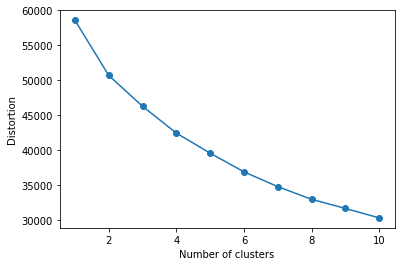

In [9]:
# calculate distortion for a range of number of cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# X=data_join
dn = data_num_sc

distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dn)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [10]:
dn.nunique()

LOAN        540
MORTDUE    5020
VALUE      5342
YOJ          99
DEROG        12
DELINQ       14
CLAGE      5285
NINQ         17
CLNO         63
DEBTINC    4678
dtype: int64

In [ ]:
f=KMENAS(dn)
xx=dn.values
y_kmeans=n.predict(xx)

In [ ]:
f

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
import seaborn as sns
sns.scatterplot(xx[y_kmeans == 0, 0],xx[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(xx[y_kmeans == 1, 0], xx[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)

sns.scatterplot(n.cluster_centers_[:, 0], n.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
data_join.head()

# MODELS

In [ ]:
f=KMENAS(dn)
f

In [ ]:
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np

In [ ]:
dn.columns

In [ ]:
corr=dn.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

In [ ]:
ccx = dn.columns
datav = np.array(dn)

In [ ]:
dn.columns


In [ ]:
X=datav
y = ccx

X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended



feature_names = [
  'LOAN',
  'MORTDUE',
  'VALUE',
  'YOJ',
  'DEROG',
  'DELINQ',
  'CLAGE',
  'NINQ',
  'CLNO',
  'DEBTINC',
   ]

figure, correlation_matrix = plot_pca_correlation_graph(X_norm, 
                                                        feature_names,
                                                        figure_axis_size=10)


In [13]:
dn.drop(['DEROG','DELINQ','NINQ','MORTDUE'], axis=1, inplace=True)

In [ ]:
correlation_matrix

In [15]:
dn.head()

,LOAN,VALUE,YOJ,CLAGE,CLNO,DEBTINC
0,-1.564803,-1.103743,0.217612,-1.019821,-1.236866,9.278411e-15
1,-1.547010,-0.588357,-0.264733,-0.692887,-0.735313,9.278411e-15
2,-1.529218,-1.495437,-0.678171,-0.363968,-1.136555,9.278411e-15
3,-1.511425,0.176608,-0.815984,-1.032121,-0.735313,9.278411e-15
4,-1.511425,-1.081022,0.010893,-0.935318,-1.337177,4.332517e-01


In [16]:
reduced_data = PCA(n_components=6).fit_transform(dn)
reduced_num = pd.DataFrame(reduced_data)
KMENAS(reduced_num)

col_0,0,1
BAD,,
0,2756,2015
1,739,350


In [17]:
dn.head()

,LOAN,VALUE,YOJ,CLAGE,CLNO,DEBTINC
0,-1.564803,-1.103743,0.217612,-1.019821,-1.236866,9.278411e-15
1,-1.547010,-0.588357,-0.264733,-0.692887,-0.735313,9.278411e-15
2,-1.529218,-1.495437,-0.678171,-0.363968,-1.136555,9.278411e-15
3,-1.511425,0.176608,-0.815984,-1.032121,-0.735313,9.278411e-15
4,-1.511425,-1.081022,0.010893,-0.935318,-1.337177,4.332517e-01


In [18]:
kpca = KernelPCA(n_components=7,kernel="rbf")
reduced_data_kpca = kpca.fit_transform(dn)
KMENAS(pd.DataFrame(reduced_data_kpca))

col_0,0,1
BAD,,
0,2564,2207
1,477,612


In [19]:
kpca = KernelPCA(n_components=7,kernel="poly")
reduced_data_kpca = kpca.fit_transform(dn)
KMENAS(pd.DataFrame(reduced_data_kpca))

col_0,0,1
BAD,,
0,4771,0
1,1088,1


In [91]:
svd = TruncatedSVD(n_components=2)
reduced_data_svd = svd.fit_transform(dn)
KMENAS(pd.DataFrame(reduced_data_svd))

col_0,0,1
BAD,,
0,2891,1880
1,757,332


# CAH 

In [95]:
def CAH(data):
    matrice = linkage(data,method='ward', metric='euclidean')
    plt.figure(figsize=(20,20))
    plt.title('Dendogramme')
    dendrogram(matrice)
    plt.show()
    return matrice

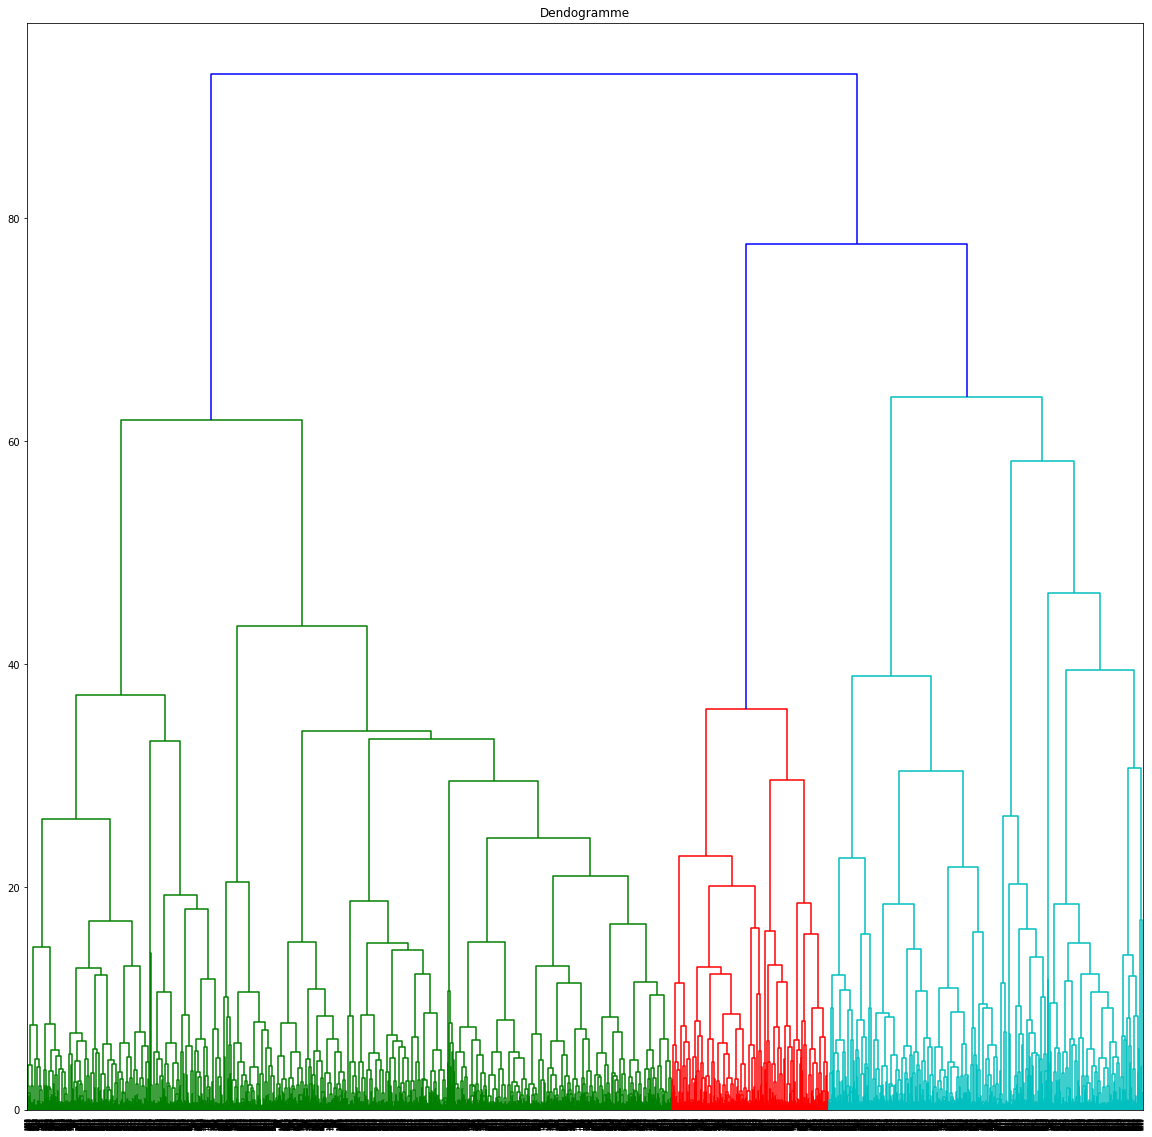

In [96]:
matrice = CAH(dn)

In [98]:
groups = fcluster(matrice, t=80, criterion='distance')
pd.crosstab(labels,groups)

col_0,1,2
BAD,,
0,2696,2075
1,689,400


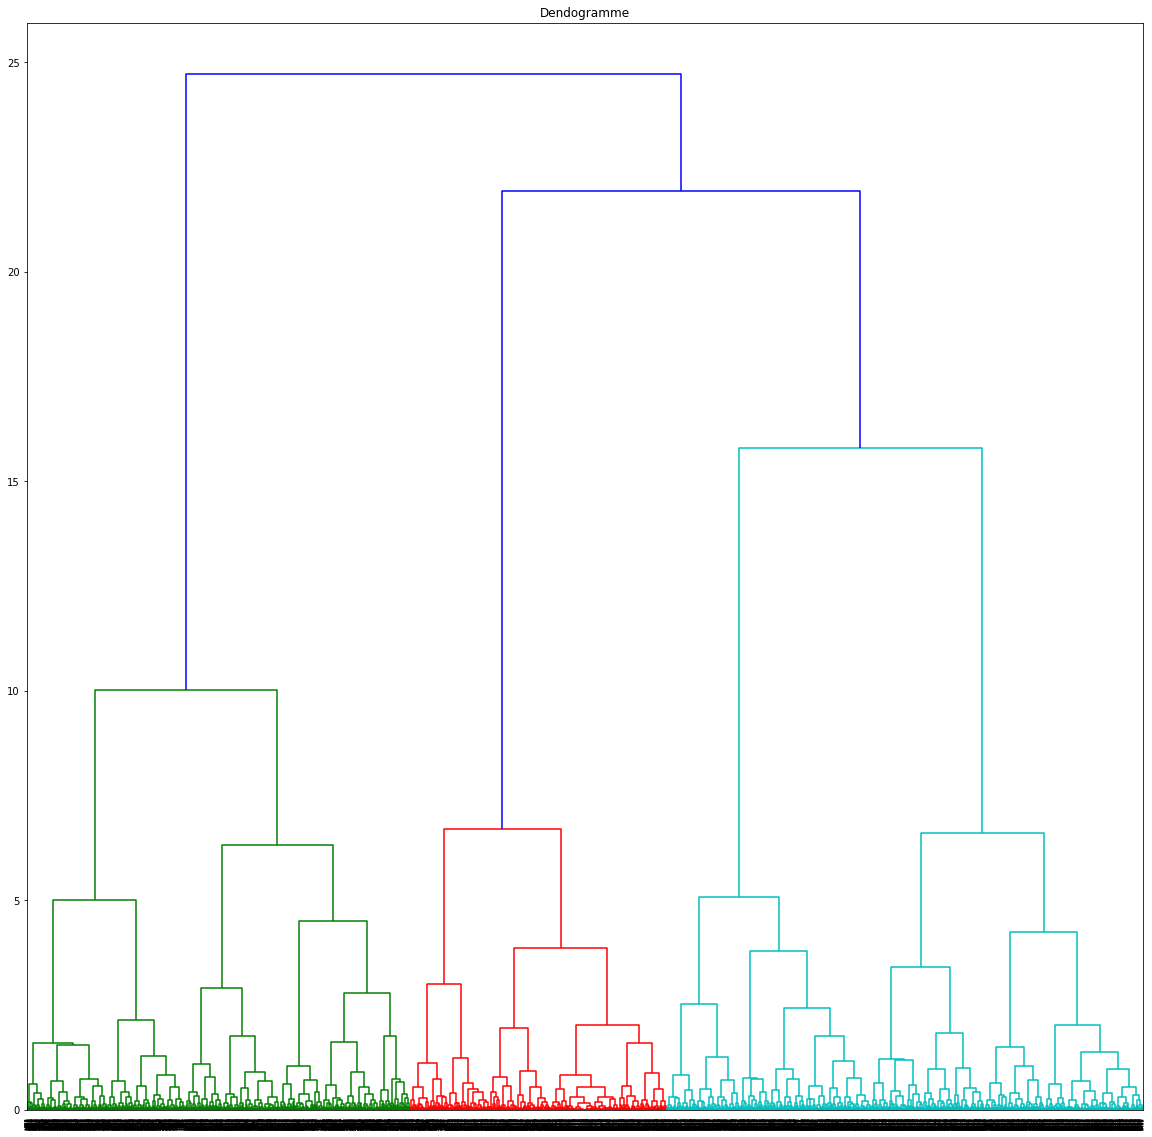

In [103]:
kpca = KernelPCA(n_components=2,kernel="rbf")
reduced_data_kpca = kpca.fit_transform(dn)
matrice = CAH(reduced_data_kpca)

In [104]:
groups = fcluster(matrice, t=23, criterion='distance')
pd.crosstab(labels,groups)

col_0,1,2
BAD,,
0,1544,3227
1,469,620


In [49]:
f,n=KMENAS(data_cat)
f

Bad Clients predicted Good : 0.68% 
Good Clients predicted Bad : 0.29% 


col_0,0,1
BAD,,
0,1384,3387
1,348,741


In [50]:
f,n=KMENAS(data_num)
f

Bad Clients predicted Good : 0.83% 
Good Clients predicted Bad : 0.18% 


col_0,0,1
BAD,,
0,3905,866
1,905,184


In [51]:
reduced_data = PCA(n_components=2).fit_transform(data_join)
reduced_num = pd.DataFrame(reduced_data)
f,n=KMENAS(reduced_num)
f

Bad Clients predicted Good : 0.68% 
Good Clients predicted Bad : 0.29% 


col_0,0,1
BAD,,
0,1384,3387
1,348,741


In [52]:
f,n=KMENAS(data_cat)
f

Bad Clients predicted Good : 0.68% 
Good Clients predicted Bad : 0.29% 


col_0,0,1
BAD,,
0,1384,3387
1,348,741


In [53]:
Spectral(data_join)

Bad Clients predicted Good : 0.68% 
Good Clients predicted Bad : 0.29% 


col_0,0,1
BAD,,
0,3387,1384
1,741,348


# droping

'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON', 'JOB'
    

In [61]:
data_join.drop(columns='DEBTINC',inplace=True)
data_join.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,REASON,JOB
0,0.000000,0.059869,0.036590,0.256098,0.000000,0.000000,0.080777,0.058824,1.0,0.4
1,0.002252,0.171050,0.071234,0.170732,0.000000,0.133333,0.104289,0.000000,1.0,0.4
2,0.004505,0.028773,0.010261,0.097561,0.000000,0.000000,0.127942,0.058824,1.0,0.4
3,0.004505,0.180378,0.110597,0.217616,0.025457,0.029963,0.153879,0.069768,0.0,0.4
4,0.006757,0.240856,0.122655,0.073171,0.000000,0.000000,0.079893,0.000000,1.0,0.2


In [62]:
KMENAS(data_join)

Bad Clients predicted Good : 0.67% 
Good Clients predicted Bad : 0.29% 


col_0,0,1
BAD,,
0,3387,1384
1,793,396


we can't make profiling

****** best result************

In [54]:
reduced_data = PCA(n_components=2).fit_transform(data_join)
reduced_num = pd.DataFrame(reduced_data)
f,n=KMENAS(reduced_num)
f

Bad Clients predicted Good : 0.68% 
Good Clients predicted Bad : 0.29% 


col_0,0,1
BAD,,
0,1384,3387
1,348,741
